In [75]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(50)

## Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let’s focus on 3 coins as follows: c<sub>1</sub> is that first coin flipped; c<sub>rand</sub> is a coin you choose at random; c<sub>min</sub> is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let ν<sub>1</sub>, ν<sub>rand</sub> and ν<sub>min</sub> be the fraction of heads you obtain for the respective three coins.

### (a) What is mu for the three coins selected?
Assuming a fair coin, P(heads) = P(tails) = 0.5. Then, for c<sub>1</sub>, c<sub>rand</sub>, c<sub>min</sub>, mu = 0.5 regardless of the outcomes of the flips.

In [76]:
def experiment(number_of_coins, number_of_flips):
    heads = np.zeros(number_of_coins)
    for _ in range(number_of_flips):
        p = np.random.uniform(size=number_of_coins)
        heads[p > 0.5] += 1
    
    random_coin =  np.random.choice(number_of_coins)
    minimum_coin = np.argmin(heads)
    heads /= number_of_flips

    v1 = heads[0]
    vrand = heads[random_coin]
    vmin = heads[minimum_coin]

    return v1, vrand, vmin

### (b) Repeat the entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of ν<sub>1</sub>, ν<sub>rand</sub>, and ν<sub>min</sub> and plot the histograms of the distributions of ν<sub>1</sub>, ν<sub>rand</sub>, and ν<sub>min</sub>. Notice that which coins end up being c<sub>rand</sub>, and c<sub>min</sub> may differ from one run to another.

In [77]:
number_of_coins = 1000
number_of_flips = 10
number_of_runs = 100000

def print_fractions(v1, vrand, vmin):
    print("v1= ", v1)
    print("vrand= ", vrand)
    print("vmin= ", vmin)

v1, vrand, vmin = experiment(number_of_coins, number_of_flips)
print_fractions(v1, vrand, vmin)

v1s, vrands, vmins = [], [], []
for _ in range(number_of_runs):
    v1, vrand, vmin = experiment(number_of_coins, number_of_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)


v1=  0.8
vrand=  0.4
vmin=  0.0


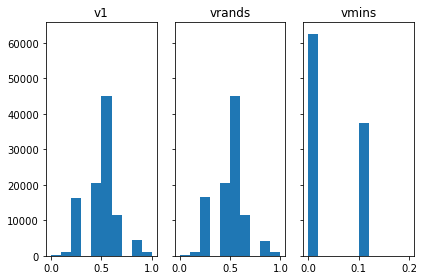

In [78]:
def plot_fractions_hist(v1s, vrands, vmins):
    n_bins = 10
    _, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
    
    axs[0].hist(v1s,bins=n_bins)
    axs[0].set_title("v1")

    axs[1].hist(vrands,bins=n_bins)
    axs[1].set_title("vrands")

    axs[2].hist(vmins,bins=n_bins)
    axs[2].set_title("vmins")

plot_fractions_hist(v1s, vrands, vmins)

### (c) Using (b), plot estimates of ℙ[|𝜈 − 𝜇| > 𝜖] as a function of ϵ, together with the Hoeffding bound 2𝑒 −2𝜖 2𝑁 (on the same graph).

In [79]:
def hoeffding(eps, N):
    return 2 * np.exp(-2 * (eps**2) * N)

In [80]:
mu = 0.5
eps = np.linspace(0, 5, 100) / number_of_flips
v1s_diff, vrands_diff, vmins_diff = np.abs(np.array(v1s) - mu), np.abs(np.array(vrands) - mu), np.abs(np.array(vmins) - mu)
p1, prand, pmin = [], [], []

for i in range(eps.shape[0]):
    eps_i = eps[i]
    p1.append(np.sum(v1s_diff > eps_i) / number_of_runs)
    prand.append(np.sum(vrands_diff > eps_i) / number_of_runs)
    pmin.append(np.sum(vmins_diff > eps_i) / number_of_runs)

hoeffding_bounds = hoeffding(eps, number_of_flips)

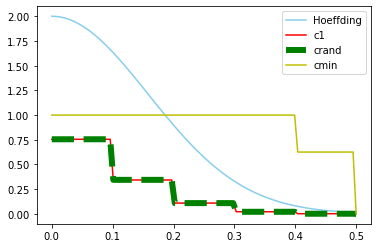

In [81]:
plt.plot(eps, hoeffding_bounds, color='skyblue', label='Hoeffding')
plt.plot(eps, p1, color='r', label='c1')
plt.plot(eps, prand, color='g', label='crand', linewidth=6, linestyle= "--")
plt.plot(eps, pmin, color='y', label='cmin')
plt.legend()

### (d) Which coins obey the Hoeffding bound, which ones do not? Explain why.
The c1  and  crand coins obey the Hoeffding inequality, but cmin does not. That's because cmin was chosen during the experiments runs based on the sample results which violates the Hoeffding's conditions stating that the hypothesis has been chosen before experiments runs.

### Relate part (d) to the multiple bins in Figure 1.


## Exercise 1.4
 
This problem leads you to explore the perceptron learning algorithm with data sets of different sizes and dimensions. You will have to generate random dataset as described in Exercise 1.4 of the book which works as follows: For a specific number of dimensions d, Choose a random target function f (randomly pick values for the d+1 weights of the perceptron), then generate N random data points {𝑥𝑖 ∈ ℝ𝑑 | 𝑖 ∈ [1, 𝑁]} and label each data point 𝑦𝑖 = 𝑓(𝑥𝑖) according to the selected target function f.

### (a) Generate a linearly separable data set of size 20 where d=2. Plot the examples {𝑥𝑛} as well as the target function f on a plane. Be sure to mark the examples from different classes y differently and add ys to the axes of the plot.

In [157]:
def generate_data(N, d):
    X = np.concatenate((np.random.randn(N, d), np.ones((N, 1))), axis=1)
    return X

def generate_target_function(X, d):
    f = np.random.randn(d+1)
    y = np.sign(np.dot(X, f)).reshape((X.shape[0], 1))
    return f, y

In [158]:
def plot_line(ax, X, w, color, label):
    xTarget = np.linspace(int(np.min(X[:, 0])*100), int(np.max(X[:, 0])+0.5)*100, num=1000)/100
    yTarget = -(w[2]+w[0]*xTarget)/w[1]
    ax.plot(xTarget, yTarget, c=color, label=label)

def plot_data(X, y, f, w=None):
    posX = X[np.where(y > 0)[0]]
    negX = X[np.where(y < 0)[0]]
    
    _, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(posX[:, 0], posX[:, 1], marker="+", s=50, c='red', label='y=+1')
    ax.scatter(negX[:, 0], negX[:, 1], marker="$-$", s=50, c='blue', label='y=-1')

    plot_line(ax, X, f, "k", "Target")
    
    if w is not None:
        plot_line(ax, X, w, "c", "Perceptron")

    plt.legend(loc='best')
    plt.show()

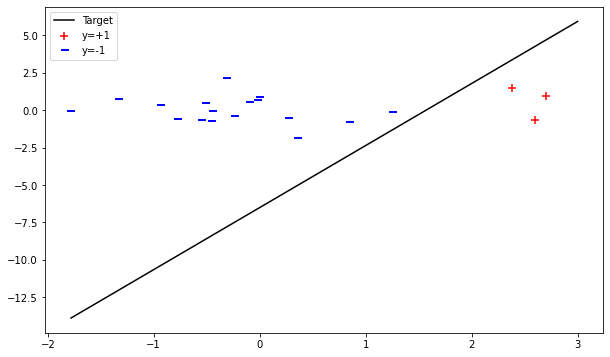

In [159]:
d = 2
N = 20

X = np.zeros(N)
y = np.ones((N, 1))
while np.all(y == 1) or not np.any(y == 1):
    X = generate_data(N, d)
    f, y = generate_target_function(X, d)
plot_data(X, y, f)

### (b) Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples, the target function f and the final hypothesis g in the same figure. Comment on whether f is close to g.

In [170]:
def perceptron_experiment(X, f, y, plot = True, random_pick = False):
    w = np.ones(X.shape[1])

    noIterations = 0
    wrongPreds = True
    maxIterations = 10000
    while wrongPreds and noIterations < maxIterations:
        if random_pick:
            t = np.arange(X.shape[0])
            np.random.shuffle(t)
            X, y = X[t, :], y[t]

        wrongPreds = False
        for i, label in enumerate(y):
            if label * np.dot(X[i, :], w) < 0:
                wrongPreds = True
                w = w +  X[i, :]*label
                break
        
        noIterations += 1
    
    if plot:
        plot_data(X, y, w, f)

    return w, noIterations

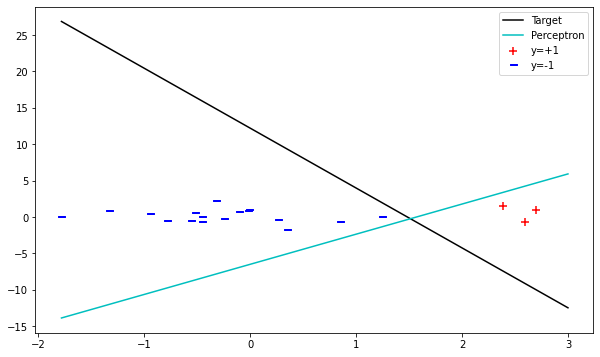

(array([ 2.02136577,  0.24565425, -3.        ]), 7)

In [161]:
perceptron_experiment(X, f, y)

### (c) Repeat everything in (b) with another randomly generated data set of size 20. Compare your results with (b).

In [162]:
def run_perceptron_experiment(N, d):
    X = np.zeros(N)
    y = np.ones((N, 1))
    while np.all(y == 1) or not np.any(y == 1):
        X = generate_data(N, d)
        f, y = generate_target_function(X, d)
    
    w, iterations = perceptron_experiment(X, f, y)
    print("Number of iterations: ", iterations)
    return X, y, f, w, iterations

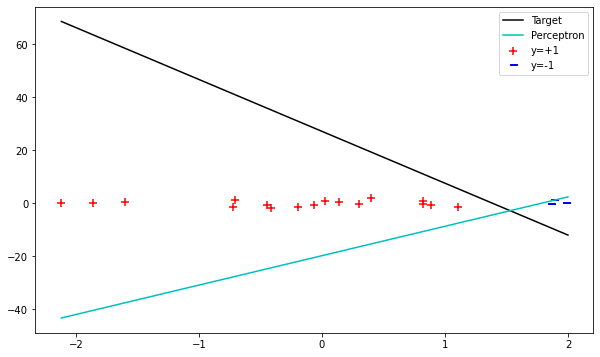

Number of iterations:  7


In [163]:
X, y, f, w, iterations = run_perceptron_experiment(20, 2)

### (d) Repeat everything in (b) with another randomly generated data set of size 100. Compare your results with (b).

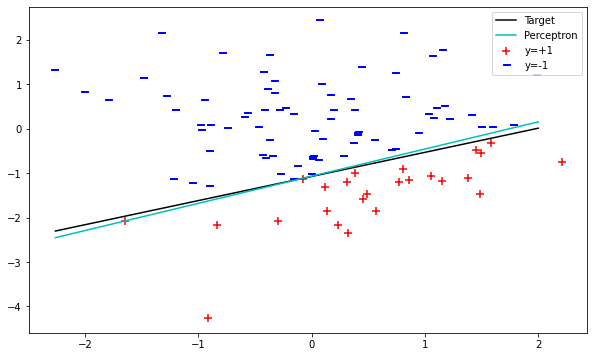

Number of iterations:  88


In [164]:
X, y, f, w, iterations = run_perceptron_experiment(100, 2)

### (e) Repeat everything in (b) with another randomly generated data set of size 1,000. Compare your results with (b).

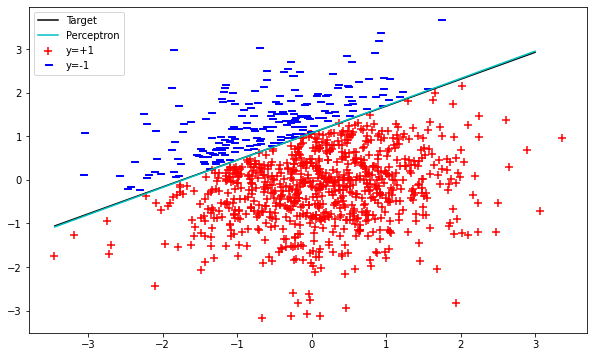

Number of iterations:  398


In [165]:
X, y, f, w, iterations = run_perceptron_experiment(1000, 2)

### (f) Modify the algorithm such that it takes d=10 instead of 2. Randomly generate a linearly separable data set of size 1,000 and feed the data set to the algorithm. How many updates does the algorithm take to converge?

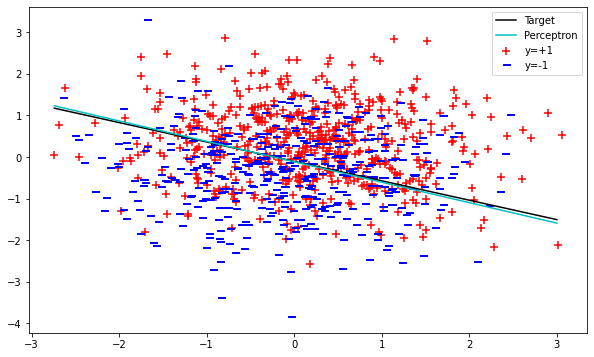

Number of iterations:  3301


In [166]:
X, y, f, w, iterations = run_perceptron_experiment(1000, 10)

### (g) Repeat the algorithm on the same data set as (f) for 100 experiments. In the iterations of each experiment, pick x(t) randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm takes to converge.

In [172]:
iters = []
for _ in range(100):
    w, iterations = perceptron_experiment(X, f, y, False, True)
    iters.append(iterations)

print(iters)

[3262, 4067, 3466, 3285, 2749, 2897, 3892, 5017, 3397, 4647, 3143, 4492, 4157, 3478, 4559, 3760, 4331, 2540, 4418, 3552, 2961, 3591, 4379, 3368, 1639, 2915, 3856, 3879, 4115, 3484, 3604, 3414, 4289, 2142, 5034, 3464, 3984, 2679, 3843, 3985, 3949, 5016, 3821, 4630, 3852, 3556, 3135, 3806, 3863, 3590, 4178, 3238, 4223, 3742, 2771, 3620, 4490, 3147, 3052, 4238, 4350, 3152, 3079, 4454, 3371, 4250, 1641, 3333, 3083, 3868, 3802, 3536, 3251, 2628, 2303, 3504, 4647, 4695, 4278, 4210, 3132, 4131, 3036, 3479, 2382, 2534, 2697, 4008, 3193, 4107, 3233, 4405, 4112, 4234, 3594, 3540, 3860, 3671, 3253, 3389]


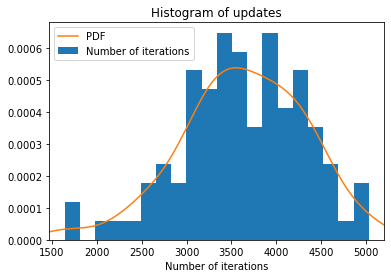

In [194]:
import scipy.stats as st
plt.hist(iters, density=True, bins=20, label="Number of iterations")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(iters)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.xlabel("Number of iterations")
plt.title("Histogram of updates");